# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Reframed data task
- The objective of this task is to frame a supervised regression problem with the target variable being the price of used cars. Using the provided dataset, we aim to identify which vehicle features, such as year, mileage, manufacturer, condition, and title status, etc., have the most significant influence on pricing. This will be done through statistical analysis and by evaluating feature importance in predictive models. Additionally, we will train and compare several machine learning models, including Linear Regression, Ridge, and Lasso, to accurately predict used car prices based on these key attributes.

##### Research questions
* Which vehicle features (e.g., year, title status, condition, mileage) have the greatest impact on used car prices?
* How well can we predict used car prices using this dataset, and what is the model’s expected error?

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Step 1:
- Load the dataset and inspect the structure by viewing column names, data types, and non-null counts.

In [12]:
df = pd.read_csv('data/vehicles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Step 2:
- Display summary statistics of the dataset to understand the distribution and central tendencies of numerical features.

In [16]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### Step 3:
- Display the first 5 rows.

In [19]:
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### Step 4:
- Display the total missing value percentages per column. 

In [22]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].round(2).sort_values(ascending=False)
print(missing_percent)

size            71.77
cylinders       41.62
condition       40.79
VIN             37.73
drive           30.59
paint_color     30.50
type            21.75
manufacturer     4.13
title_status     1.93
model            1.24
odometer         1.03
fuel             0.71
transmission     0.60
year             0.28
dtype: float64


##### Step 4.1
- The 'size' column will be dropped due to having more than 70% missing values, which makes it unreliable for analysis. Additionally, based on domain knowledge, the 'id' and 'VIN' columns are unique identifiers and are unlikely to have any meaningful impact on the car’s price. The 'region' and 'model' columns are also dropped since we will have the 'manufacturer' and 'state' columns.

In [25]:
df_dropped = df.drop(columns=['size','id','VIN','region','model'])

##### Step 4.2
- Drop data with 0 price.

In [28]:
df_dropped = df_dropped[df_dropped['price'] != 0]

##### Step 4.3
- Now we replace the missing data using mode.

In [31]:
imputer = SimpleImputer(strategy='most_frequent')
df_clean = pd.DataFrame(imputer.fit_transform(df_dropped), columns=df_dropped.columns)
for col in df_dropped.columns:
    df_clean[col] = df_clean[col].astype(df_dropped[col].dtype)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393985 entries, 0 to 393984
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         393985 non-null  int64  
 1   year          393985 non-null  float64
 2   manufacturer  393985 non-null  object 
 3   condition     393985 non-null  object 
 4   cylinders     393985 non-null  object 
 5   fuel          393985 non-null  object 
 6   odometer      393985 non-null  float64
 7   title_status  393985 non-null  object 
 8   transmission  393985 non-null  object 
 9   drive         393985 non-null  object 
 10  type          393985 non-null  object 
 11  paint_color   393985 non-null  object 
 12  state         393985 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 39.1+ MB


#### Step 5
- Use plots to detect the potential relationships between each of the numeric features and the price.

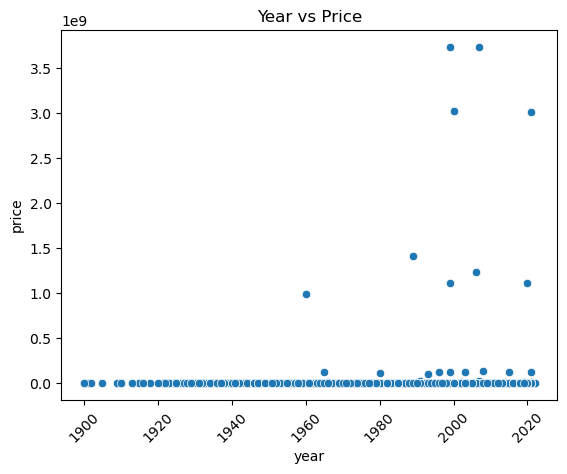

In [34]:
sns.scatterplot(data=df_clean, x='year',y='price')
plt.title('Year vs Price')
plt.xticks(rotation = 45)
plt.show()

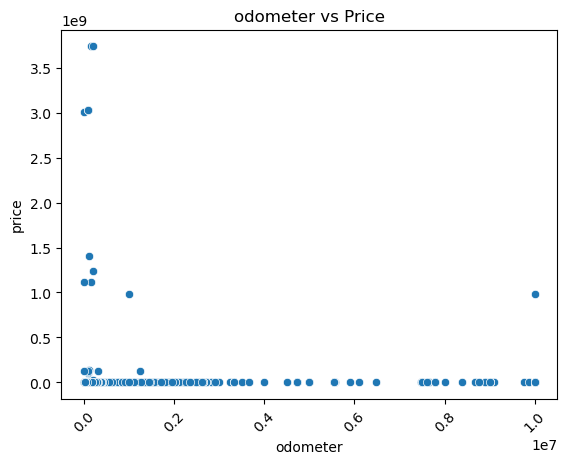

In [36]:
sns.scatterplot(data=df_clean, x='odometer',y='price')
plt.title('odometer vs Price')
plt.xticks(rotation = 45)
plt.show()

#### Step 6
- Use plots to detect the potential relationships between each of the non-numeric features and the price.

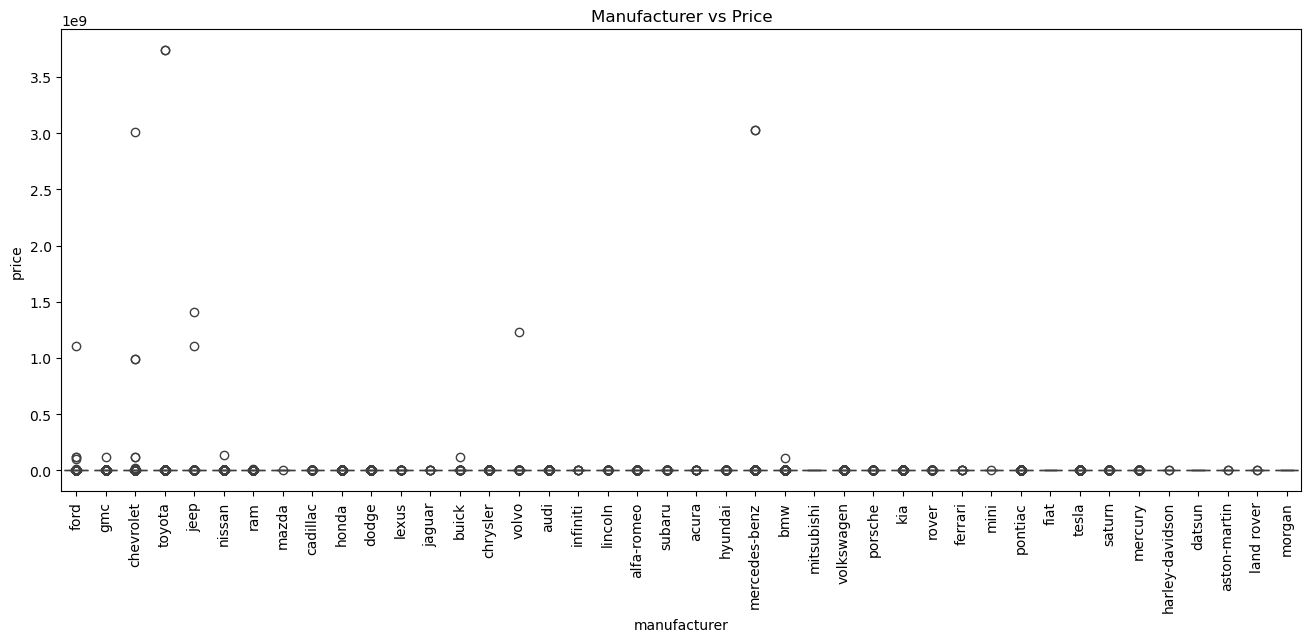

In [40]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_clean, x='manufacturer',y='price')
plt.title('Manufacturer vs Price')
plt.xticks(rotation = 90)
plt.show()

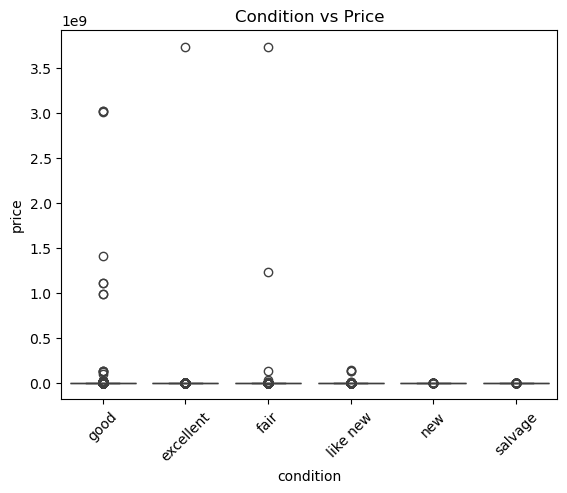

In [42]:
sns.boxplot(data=df_clean, x='condition',y='price')
plt.title('Condition vs Price')
plt.xticks(rotation = 45)
plt.show()

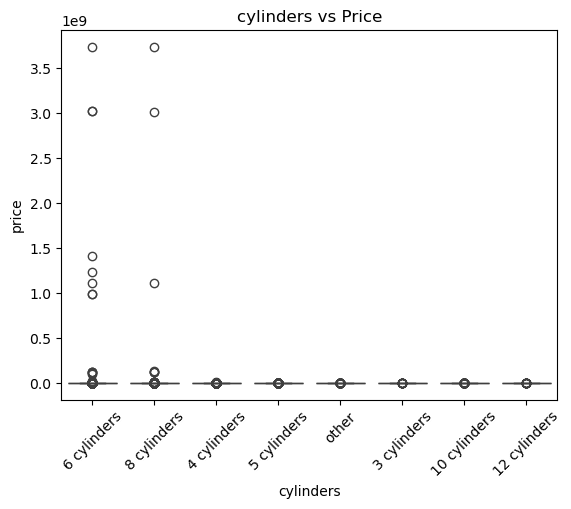

In [44]:
sns.boxplot(data=df_clean, x='cylinders',y='price')
plt.title('cylinders vs Price')
plt.xticks(rotation = 45)
plt.show()

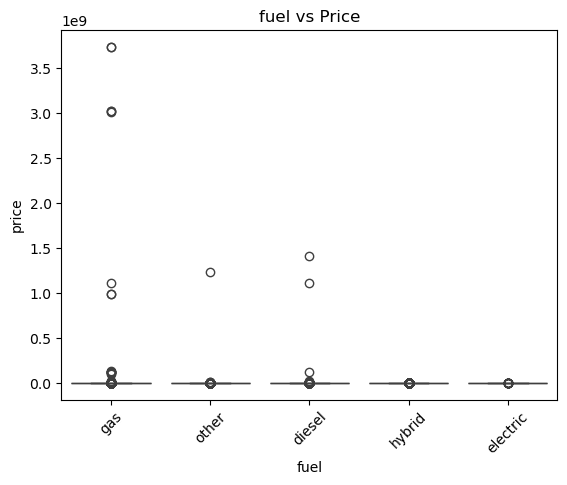

In [46]:
sns.boxplot(data=df_clean, x='fuel',y='price')
plt.title('fuel vs Price')
plt.xticks(rotation = 45)
plt.show()

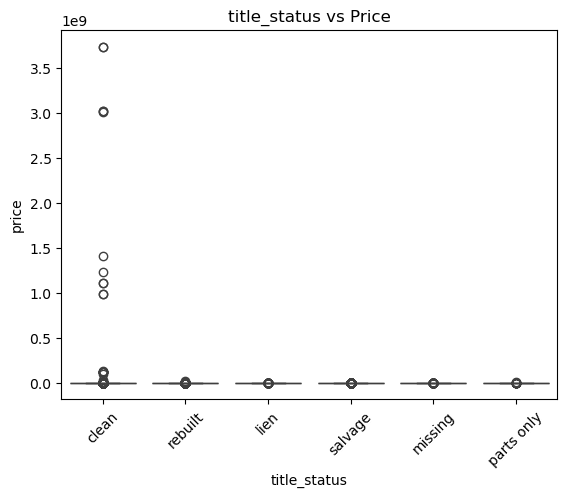

In [48]:
sns.boxplot(data=df_clean, x='title_status',y='price')
plt.title('title_status vs Price')
plt.xticks(rotation = 45)
plt.show()

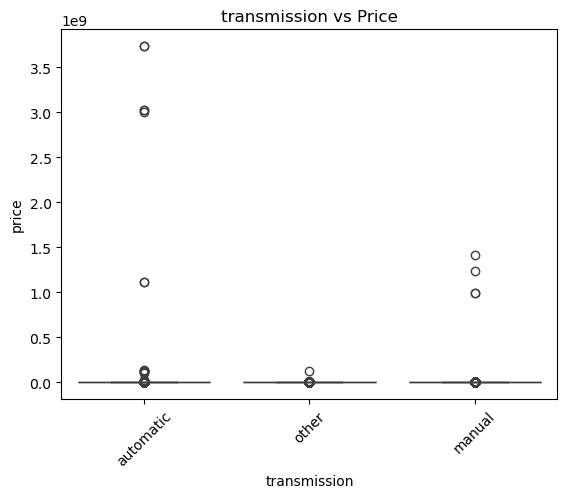

In [50]:
sns.boxplot(data=df_clean, x='transmission',y='price')
plt.title('transmission vs Price')
plt.xticks(rotation = 45)
plt.show()

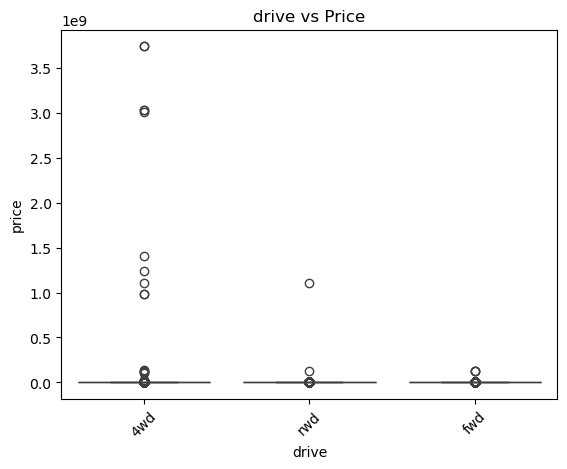

In [52]:
sns.boxplot(data=df_clean, x='drive',y='price')
plt.title('drive vs Price')
plt.xticks(rotation = 45)
plt.show()

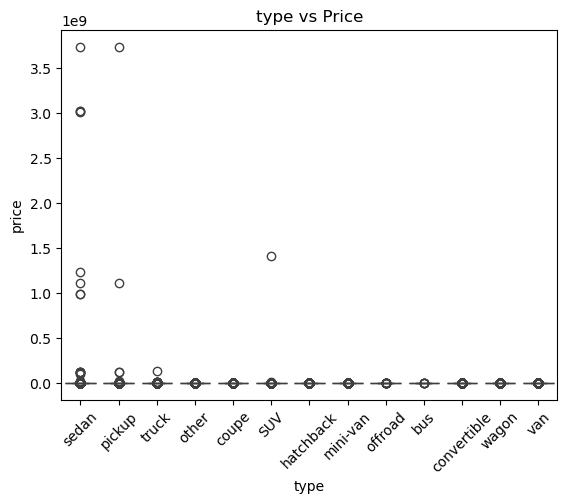

In [54]:
sns.boxplot(data=df_clean, x='type',y='price')
plt.title('type vs Price')
plt.xticks(rotation = 45)
plt.show()

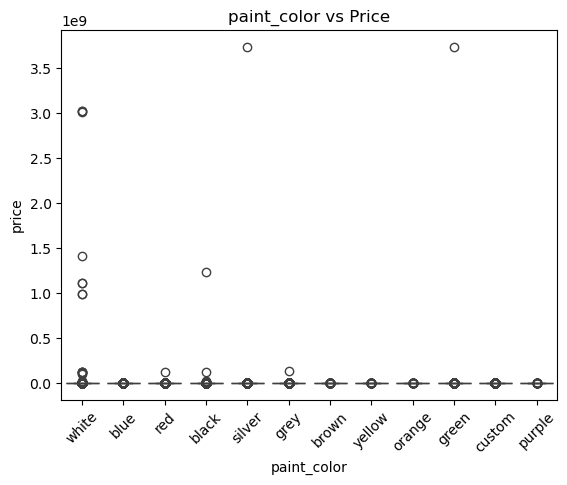

In [56]:
sns.boxplot(data=df_clean, x='paint_color',y='price')
plt.title('paint_color vs Price')
plt.xticks(rotation = 45)
plt.show()

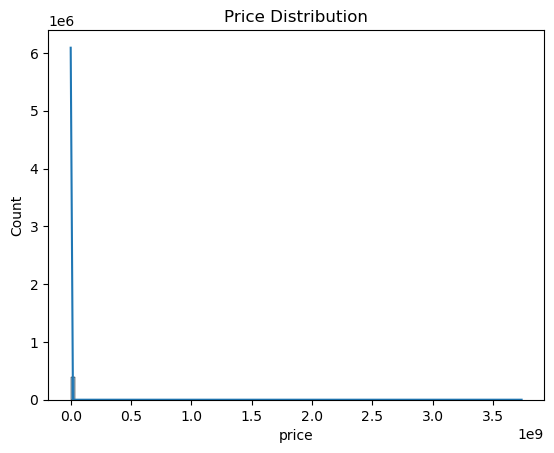

In [59]:
sns.histplot(df_clean['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Remove outliers
- Remove outliers from 'price' column
- Remove outliers from 'odometer' column

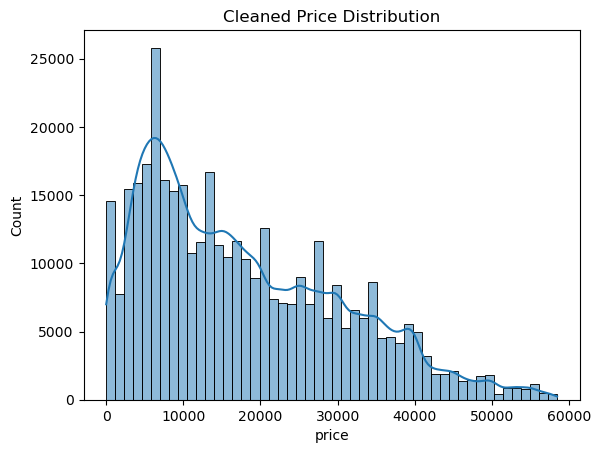

In [68]:
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

df_clean_removed_outliers = remove_outliers_iqr(df_clean, 'price')
df_clean_removed_outliers = remove_outliers_iqr(df_clean_removed_outliers, 'odometer')
sns.histplot(df_clean_removed_outliers['price'], bins=50, kde=True)
plt.title('Cleaned Price Distribution')
plt.show()

#### Other columns
- Based on domain knowledge, the 'manufacturer', 'model', 'condition','title_status', and 'transmission' will affect the price of used cars significantly. However, since there are too many unique values of 'model' and 'region', here we only include the 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission','drive','type','paint_color',and 'state' columns.

In [71]:
categorical_cols = ['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','state'] 
df_encoded = pd.get_dummies(df_clean_removed_outliers, columns=categorical_cols, drop_first=True)
df_encoded.head()

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,6000,2018.0,100000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11900,2018.0,100000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,21000,2018.0,100000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1500,2018.0,100000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4900,2018.0,100000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305936 entries, 251232 to 121958
Columns: 141 entries, year to state_wy
dtypes: float64(141)
memory usage: 331.4 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### I created the following four models from which to choose the best one. GridSearchCV are used for both Ridge and Lasso regressions, and RandomizedSearchCV was used for Random Forest.

##### LinearRegression

In [83]:
lng = LinearRegression()
lng.fit(X_train, y_train)

LinearRegression()

##### Ridge regression 

In [86]:
ridge = Ridge()
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100]}
gridsearchcv_grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
gridsearchcv_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

##### Lasso regression 

In [88]:
lasso = Lasso()
param_grid_lasso = {'alpha':[0.01, 0.1, 1, 10, 100]}
gridsearchcv_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
gridsearchcv_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

##### Random Forest

In [91]:
rfregression = RandomForestRegressor(n_jobs=-1, random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20, None],
    'max_features': ['sqrt', 'log2', None]
}
# The GridSearchCV is extremely slow. Therefore, I use RandomizedSearchCV here.
randomizedsearch_rf = RandomizedSearchCV(estimator=rfregression, param_distributions=param_grid_rf, cv=5, scoring='neg_root_mean_squared_error', n_iter=10)
randomizedsearch_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [50, 100, 150]},
                   scoring='neg_root_mean_squared_error')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [94]:
lng_predict = lng.predict(X_test)
lng_error = mean_squared_error( y_test, lng_predict)
print(np.sqrt(lng_error))
coeff_lng = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lng.coef_
})

print(coeff_lng)

8360.561826064797
                       Feature  Coefficient
0                         year  3081.795170
1                     odometer -5547.777984
2      manufacturer_alfa-romeo   108.176807
3    manufacturer_aston-martin    -8.911573
4            manufacturer_audi   232.100101
..                         ...          ...
136                   state_vt  -292.065250
137                   state_wa  -178.909928
138                   state_wi  -685.270236
139                   state_wv   -84.746638
140                   state_wy   -47.421886

[141 rows x 2 columns]


In [96]:
ridge_predict = gridsearchcv_grid.predict(X_test)
ridge_error = mean_squared_error(y_test, ridge_predict)
print(np.sqrt(ridge_error))
print(gridsearchcv_grid.best_params_)
best_model_grid = gridsearchcv_grid.best_estimator_
coef_ridge = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_model_grid.coef_
})

print(coef_ridge)

8360.614430879108
{'alpha': 100}
                       Feature  Coefficient
0                         year  3081.053652
1                     odometer -5545.572091
2      manufacturer_alfa-romeo   109.181002
3    manufacturer_aston-martin    -8.766196
4            manufacturer_audi   234.995063
..                         ...          ...
136                   state_vt  -284.041288
137                   state_wa  -161.881809
138                   state_wi  -668.471212
139                   state_wv   -79.651691
140                   state_wy   -43.615783

[141 rows x 2 columns]


In [98]:
lasso_predict = gridsearchcv_lasso.predict(X_test)
lasso_error = mean_squared_error(y_test, lasso_predict)
print(np.sqrt(lasso_error))
print(gridsearchcv_lasso.best_params_)
best_model_lasso = gridsearchcv_lasso.best_estimator_
coef_lasso = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_model_lasso.coef_
})

print(coef_lasso)

8360.582536219628
{'alpha': 0.1}
                       Feature  Coefficient
0                         year  3081.799453
1                     odometer -5548.002787
2      manufacturer_alfa-romeo   108.644706
3    manufacturer_aston-martin    -8.709379
4            manufacturer_audi   233.652689
..                         ...          ...
136                   state_vt  -286.461250
137                   state_wa  -167.018933
138                   state_wi  -673.556990
139                   state_wv   -81.120646
140                   state_wy   -44.685558

[141 rows x 2 columns]


4451.244529315225
{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': None}
                  Feature  Coefficient
0                    year     0.245822
1                odometer     0.223048
65     transmission_other     0.041744
56               fuel_gas     0.041120
66              drive_fwd     0.031257
50  cylinders_4 cylinders     0.024777
75            type_pickup     0.024689
76             type_sedan     0.021027
53  cylinders_8 cylinders     0.016875
44         condition_good     0.015131
77             type_truck     0.014665
52  cylinders_6 cylinders     0.011860
35       manufacturer_ram     0.011346
89      paint_color_white     0.010937
67              drive_rwd     0.010164


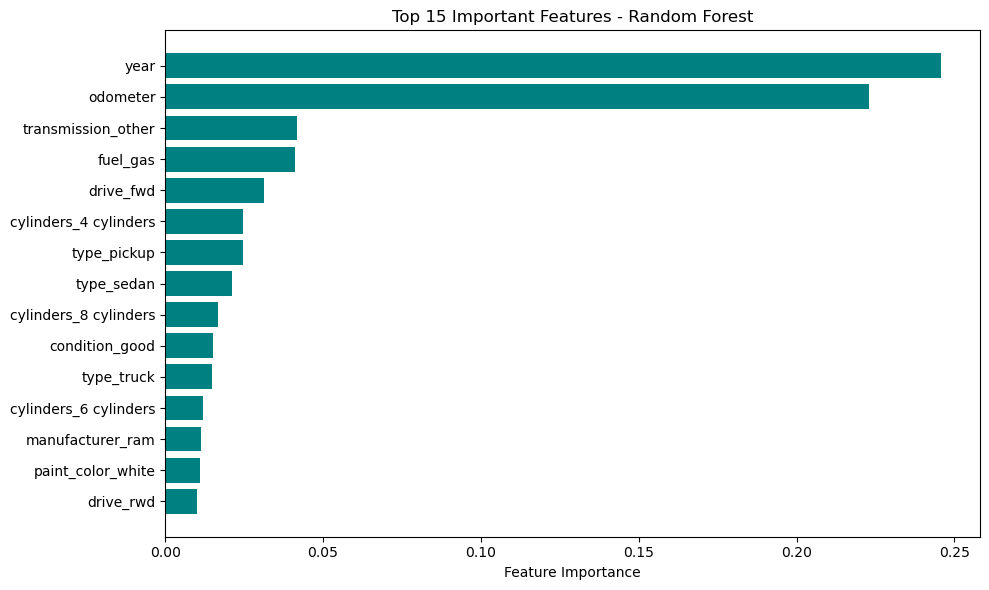

In [100]:
rf_predict = randomizedsearch_rf.predict(X_test)
rf_error = mean_squared_error(y_test, rf_predict)
print(np.sqrt(rf_error))
print(randomizedsearch_rf.best_params_)
best_model_rf = randomizedsearch_rf.best_estimator_
coef_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_model_rf.feature_importances_
}).sort_values(by='Coefficient', ascending=False)

print(coef_rf.head(15))
top_features = coef_rf.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Coefficient'][::-1], color='teal')
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()

#### Here is the comparison table of all above models:

- **Linear Regression**  
  - RMSE: $8360.56  
  - Notes: Fast, but less accurate  

- **Ridge Regression**  
  - RMSE: $8360.61  
  - Notes: Similar to Linear, slightly improved  

- **Lasso Regression**  
  - RMSE: $8360.58  
  - Notes: Time-consuming(~8 minutes), minimal improvement  

- **Random Forest**  
  - **RMSE: $4451.24**  
  - **Notes: Best performer, highly accurate, Time-consuming (~17 minutes)**

#### Business Objective Recap
The goal was to **predict used car prices** and **identify main factors that influence pricing**, helping the used car dealers gain insight into vehicle valuation.

#### Model Performance
The **Random Forest Regressor** achieved the best performance with:
- **Test RMSE**: $4451.24  
- **Best Parameters**: `n_estimators=50`, `max_features='sqrt'`, `max_depth=None`  
- This result significantly outperforms linear models such as Linear Regression, Ridge, and Lasso (all around **$8360 RMSE**), indicating Random Forest is better suited for capturing non-linear patterns in this dataset.

#### Feature Importance Insights
The model reveals that **year and mileage** are the top predictors of price:
- `year` (importance: 0.245822)
- `odometer` (importance: 0.223048)
- `transmission`, `fuel`, `drive`, `engine cylinders`, and even `type`, such as `pickup`, `sedan`,  etc.

#### Interpretation vs. Performance
- **Random Forest** offers high accuracy but limited interpretability.
- **Linear models** are more interpretable but underperform in prediction.
- Depending on client needs (explainability vs. accuracy), the model choice may vary.

#### Revisiting Earlier Phases?
- **No major gaps found**, but we could:
  - Drop low-importance features to simplify the model.
  - Tune further if more accuracy is needed.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### Objective
To help used car dealers **better understand what drives car prices**, and make smarter inventory and pricing decisions.

#### Key Insights

1. **Most Influential Factors on Price:**
   - **Year of Manufacture** : Newer cars retain higher prices.
   - **Mileage (`odometer`)** : Lower mileage = higher value.
   - **Transmission Type** : Uncommon transmissions impact pricing.
   - **Fuel Type** : Fuel types show distinct trends.
   - **Drive Type & Engine Cylinders & Body Type** :– Drive configuration and engine size and sedans/trucks contribute to value.
   - **Vehicle Condition** : As expected, better condition boosts value.

2. **Price Prediction Accuracy:**
   - Our best model (Random Forest) predicts car prices with an average error of **~$4451.24**, which is significantly better than traditional models.
   - This model accounts for non-linear trends and complex feature interactions.

#### Model Summary

- **Linear Regression**  
  - RMSE: $8360.56

- **Ridge Regression**  
  - RMSE: $8360.61

- **Lasso Regression**  
  - RMSE: $8360.58

- **Random Forest**  
  - **RMSE: $4451.24**  

#### Recommendations for Dealers

- **Prioritize newer, low-mileage vehicles** : they retain more value.
- **Consider transmission, fuel and drive types when buying/selling** : these features impact pricing.
- **Use this model as a pricing assistant** : to estimate fair market value.